# 04_perceptron

# Q1：Logistic Sigmoid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

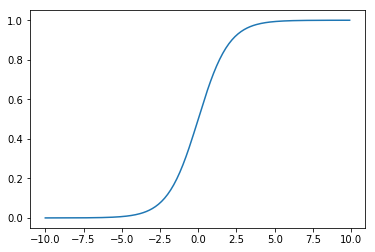

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ<br><br>パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

### 【Logistic Sigmoidをアクティベーション関数に持つパーセプトロンモデル】

<img src="images/method.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>Logistic Sigmoid をアクティベーション関数として<br>持つパーセプトロンを用いて作成せよ。<br><br>パーセプトロンのパラメータの調整には平均二乗誤差と最急降下法を用いること。<br><br>また、調整済みのパラメータを保存し、作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<img src="images/perceptron.png"  height="50%" width="50%" align="left">

用意するデータ  
入力データ = np.array([ , , , , , , ])  
正解データ = np.array([ , , , , , , ])


入力層(式)  
$
y= a*[ , , , , ,...] + b
$

中間層(シグモイド関数: a=1とする)  
$ 
S = \frac{1}{1-e^-y}  
$

誤差関数(平均二乗誤差)  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  

- 誤差関数(平均二乗誤差)  

z = 真の値  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測値 - z_i)^2
$  
$  
E(a) = \frac{1}{n}\sum_{i}{((\frac{1}{1-e^-(aX_i+b)}) -z_i)^2}
$



- 最急降下法  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-z_i)^2}{d  a}
$  
- パラメータaの微分式  
$
a^(k+1) = a^(k) -v\frac{1}{n}\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-z_i)*a*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))*2
$
- バイアスbの微分式  
$
b^(k+1) =  b^(k) -v\frac{1}{n}\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-z_i)*b*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))*2
$

<img src="images/" height="50%" width="50%" align="left">

mean_squared_error :  0.13983269759843345
mean_squared_error :  0.13831078709351843
mean_squared_error :  0.13681061867904568
mean_squared_error :  0.13533183794256418
mean_squared_error :  0.13387409630007696
mean_squared_error :  0.13243705091962496
mean_squared_error :  0.13102036464471437
mean_squared_error :  0.12962370591766242
mean_squared_error :  0.1282467487029237
mean_squared_error :  0.126889172410461
mean_squared_error :  0.12555066181922078
mean_squared_error :  0.12423090700076843
mean_squared_error :  0.12292960324313584
mean_squared_error :  0.12164645097493479
mean_squared_error :  0.12038115568977706
mean_squared_error :  0.11913342787105433
mean_squared_error :  0.11790298291711011
mean_squared_error :  0.1166895410668511
mean_squared_error :  0.1154928273258306
mean_squared_error :  0.11431257139283695
mean_squared_error :  0.11314850758702381
mean_squared_error :  0.1120003747756067
mean_squared_error :  0.11086791630215746
mean_squared_error :  0.1097508799155205

mean_squared_error :  0.011810509447576037
mean_squared_error :  0.011765922127303863
mean_squared_error :  0.011721584200784913
mean_squared_error :  0.011677493831364473
mean_squared_error :  0.01163364919907841
mean_squared_error :  0.011590048500473982
mean_squared_error :  0.011546689948432198
mean_squared_error :  0.01150357177199255
mean_squared_error :  0.011460692216180231
mean_squared_error :  0.011418049541835115
mean_squared_error :  0.011375642025442872
mean_squared_error :  0.01133346795896839
mean_squared_error :  0.011291525649690933
mean_squared_error :  0.011249813420041697
mean_squared_error :  0.011208329607442963
mean_squared_error :  0.011167072564149444
mean_squared_error :  0.01112604065709151
mean_squared_error :  0.01108523226772029
mean_squared_error :  0.011044645791854777
mean_squared_error :  0.011004279639530535
mean_squared_error :  0.010964132234850512
mean_squared_error :  0.010924202015837665
mean_squared_error :  0.010884487434288903
mean_squared_err

mean_squared_error :  0.004401961702151851
mean_squared_error :  0.004391705896661037
mean_squared_error :  0.004381485756835469
mean_squared_error :  0.004371301118128168
mean_squared_error :  0.004361151816936216
mean_squared_error :  0.004351037690594312
mean_squared_error :  0.0043409585773684515
mean_squared_error :  0.00433091431644947
mean_squared_error :  0.004320904747946703
mean_squared_error :  0.004310929712881906
mean_squared_error :  0.004300989053182818
mean_squared_error :  0.004291082611677096
mean_squared_error :  0.0042812102320861955
mean_squared_error :  0.0042713717590193555
mean_squared_error :  0.004261567037967464
mean_squared_error :  0.0042517959152971315
mean_squared_error :  0.0042420582382448335
mean_squared_error :  0.004232353854910905
mean_squared_error :  0.004222682614253857
mean_squared_error :  0.00421304436608437
mean_squared_error :  0.0042034389610598605
mean_squared_error :  0.004193866250678464
mean_squared_error :  0.0041843260872736635
mean_s

mean_squared_error :  0.002011531561789699
mean_squared_error :  0.002008352211588187
mean_squared_error :  0.0020051803809105896
mean_squared_error :  0.002002016046103044
mean_squared_error :  0.001998859183604496
mean_squared_error :  0.0019957097699461845
mean_squared_error :  0.0019925677817512937
mean_squared_error :  0.00198943319573447
mean_squared_error :  0.001986305988701421
mean_squared_error :  0.0019831861375484627
mean_squared_error :  0.0019800736192620697
mean_squared_error :  0.001976968410918576
mean_squared_error :  0.0019738704896835745
mean_squared_error :  0.001970779832811693
mean_squared_error :  0.0019676964176459696
mean_squared_error :  0.0019646202216176707
mean_squared_error :  0.0019615512222456995
mean_squared_error :  0.0019584893971362513
mean_squared_error :  0.0019554347239824302
mean_squared_error :  0.0019523871805638138
mean_squared_error :  0.0019493467447460578
mean_squared_error :  0.001946313394480519
mean_squared_error :  0.001943287107803835

mean_squared_error :  0.001132882471564209
mean_squared_error :  0.0011315368980270456
mean_squared_error :  0.0011301937182802793
mean_squared_error :  0.0011288529266543427
mean_squared_error :  0.0011275145174964778
mean_squared_error :  0.0011261784851706327
mean_squared_error :  0.0011248448240573485
mean_squared_error :  0.0011235135285537728
mean_squared_error :  0.001122184593073589
mean_squared_error :  0.0011208580120469556
mean_squared_error :  0.001119533779920373
mean_squared_error :  0.001118211891156761
mean_squared_error :  0.001116892340235304
mean_squared_error :  0.0011155751216514128
mean_squared_error :  0.0011142602299166757
mean_squared_error :  0.0011129476595588207
mean_squared_error :  0.001111637405121615
mean_squared_error :  0.0011103294611648372
mean_squared_error :  0.0011090238222642294
mean_squared_error :  0.0011077204830113963
mean_squared_error :  0.001106419438013843
mean_squared_error :  0.0011051206818947685
mean_squared_error :  0.001103824209293

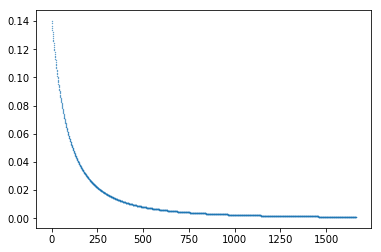

In [75]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum(s - answer)**2/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, answer, predicted_data):
        """パラメータ更新
        param1 : answer (正解値)
        param2 : predicted_data (予測データ)
        """
        self._a = self._a - self._v*((2*(sum(predicted_data-answer))/len(predicted_data))*(self._a*predicted_data)*(1-predicted_data))  # 重みパラメータ
        self._b = self._b - self._v*((2*(sum(predicted_data-answer))/len(predicted_data))*(self._b*predicted_data)*(1-predicted_data))  # バイアス


if __name__=='__main__':
    input_data = np.array([0, 1, 1, 0, 1, 0, 0, 1])  # 入力値
    answer_data = np.array([1, 0, 0, 1, 0, 1, 1, 0])  # 正解値
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 


    for _ in range(100000):
        if mean_squared_error is not None and mean_squared_error < 0.001:  # 誤差0.01以下になったら終わり
            break
        else:
            y = neuron.input_layer(input_data)  # 入力層
            s = neuron.activation_function(y)  # 中間層
            mean_squared_error = neuron.error_function(s, answer_data)  # 出力層　： 誤差関数

            neuron.parameter_update(answer_data, s)  # パラメータ更新

            print("mean_squared_error : ", mean_squared_error)
            error_list.append(mean_squared_error)

    
    # 描画
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=0.1, marker='o')

    plt.show()